In [1]:
import IPython.display as disp
import pandas as pd

import torch

from torchviz import make_dot

In [2]:
def _print(text):
    print("\n{}".format(text))
    
def print_(text):
    print("{}\n".format(text))

def _print_(text):
    print("\n{}\n".format(text))
    
def print_all(W, b, x, y, t):
    variables = (W, b, x, y, t)
    names = ("W", "b", "x", "y", "t")
    for idx, v in enumerate(variables):
        print("{}.data:\n{}".format(names[idx], v))
        print("{}.grad:\n{}".format(names[idx], v.grad))

def print_all_id(id_, W, b, x, y, t):
    variables = (W, b, x, y, t)
    names = ["{}{}".format(a, id_) for a in ("W", "b", "x", "y", "t")]
    print("-- Parameters of fast model {} --".format(id_))
    for idx, v in enumerate(variables):
        print("{}.data:\n{}".format(names[idx], v))
        print("{}.grad:\n{}".format(names[idx], v.grad))
    print()

def print_wb(W, b):
    variables = (W, b)
    names = ("W", "b")
    print("-- W, b --")
    for idx, v in enumerate(variables):
        print("{}.data:\n{}".format(names[idx], v))
        print("{}.grad:\n{}".format(names[idx], v.grad))
    print("-- -- --\n")

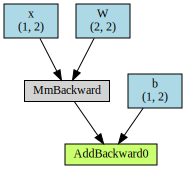

W.data:
tensor([[ 1.0000,  0.5000],
        [-0.8000,  1.3000]], requires_grad=True)
W.grad:
None
b.data:
tensor([[1., 1.]], requires_grad=True)
b.grad:
None
x.data:
tensor([[4.5000, 9.5000]], requires_grad=True)
x.grad:
None
y.data:
tensor([[-2.1000, 15.6000]], grad_fn=<AddBackward0>)
y.grad:
None
t.data:
tensor([[2., 3.]])
t.grad:
None

loss = 87.78498840332031

------------------------------------------------------------------

Calling autograd.grad...

grads calculated: (tensor([[-18.4500,  56.7000],
        [-38.9500, 119.7000]], grad_fn=<MmBackward>), tensor([[-4.1000, 12.6000]], grad_fn=<MulBackward1>), tensor([[ 2.2000, 19.6600]], grad_fn=<MmBackward>))

Updating W, b...

W.data:
tensor([[  2.8450,  -5.1700],
        [  3.0950, -10.6700]], grad_fn=<SubBackward0>)
W.grad:
None
b.data:
tensor([[ 1.4100, -0.2600]], grad_fn=<SubBackward0>)
b.grad:
None
x.data:
tensor([[4.5000, 9.5000]], requires_grad=True)
x.grad:
None
y.data:
tensor([[-2.1000, 15.6000]], grad_fn=<AddBackward0>)
y.

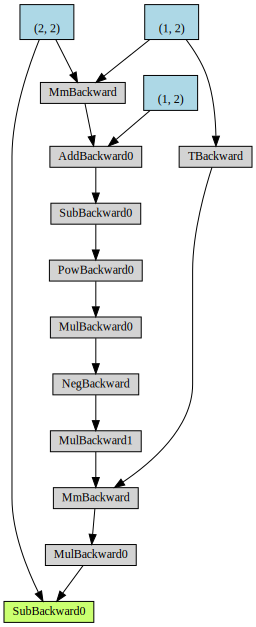


------------------------------------------------------------------

Calling autograd.grad 2nd time...

grads:
(tensor([[  185.0175,  -577.7550],
        [  390.5926, -1219.7050]]), tensor([[  41.1150, -128.3900]]), tensor([[1841.9188, 5421.9023]]))



In [3]:
# Check the double gradient calculation.

CREATE_GRAPH = True  # Toggling this toggles second order calculation's inclusion of gradients.


# Define "model".

W = torch.tensor([[1., 0.5], [-0.8, 1.3]], requires_grad=True)
b = torch.tensor([[1., 1.]], requires_grad=True)

x = torch.tensor([[4.5, 9.5]], requires_grad=True)

y = torch.matmul(x, W) + b
t = torch.tensor([[2., 3.]], requires_grad=False)

disp.display(make_dot(y, params={"W": W, "b": b, "x": x, "y": y}))
print_all(W, b, x, y, t)

loss = ((t - y)**2).mean()
_print("loss = {}".format(loss))



_print_("------------------------------------------------------------------")

print("Calling autograd.grad...\n")
grads = torch.autograd.grad(outputs=loss, inputs=(W, b, x), grad_outputs=torch.tensor(1.), retain_graph=True, create_graph=CREATE_GRAPH)
print_("grads calculated: {}".format(grads))

print_("Updating W, b...")
W.grad = grads[0]
b.grad = grads[1]
W = W - 0.1 * W.grad
b = b - 0.1 * b.grad

print_all(W, b, x, y, t)

_print("W graph (after updating):")
disp.display(make_dot(W))

t2 = torch.tensor([[2.5, 3.5]], requires_grad=False)
y2 = torch.matmul(x, W) + b
# disp.display(make_dot(y2))
loss2 = ((t2 - y2)**2).mean()



_print_("------------------------------------------------------------------")

print_("Calling autograd.grad 2nd time...")
print("grads:")
grads = torch.autograd.grad(outputs=loss2, inputs=(W, b, x), grad_outputs=torch.tensor(1.), retain_graph=False, create_graph=False)
print_(grads)


W, b initially:
-- W, b --
W.data:
tensor([[ 1.0000,  0.5000],
        [-0.8000,  1.3000]], requires_grad=True)
W.grad:
None
b.data:
tensor([[1., 1.]], requires_grad=True)
b.grad:
None
-- -- --


------------------------------------------------------------------

Fast model 1:

-- Parameters of fast model 1 --
W1.data:
tensor([[ 1.0000,  0.5000],
        [-0.8000,  1.3000]], grad_fn=<CloneBackward>)
W1.grad:
None
b1.data:
tensor([[1., 1.]], grad_fn=<CloneBackward>)
b1.grad:
None
x1.data:
tensor([[4.5000, 9.5000]], requires_grad=True)
x1.grad:
None
y1.data:
tensor([[-2.1000, 15.6000]], grad_fn=<AddBackward0>)
y1.grad:
None
t1.data:
tensor([[2., 3.]])
t1.grad:
None


loss1 = 87.78498840332031

loss1 graph:


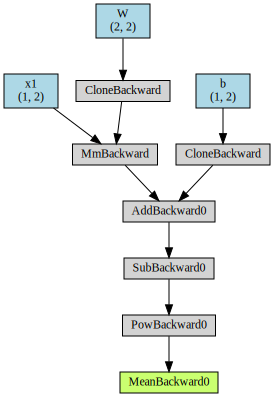


------------------------------------------------------------------

Fast model 2:

-- Parameters of fast model 2 --
W2.data:
tensor([[ 1.0000,  0.5000],
        [-0.8000,  1.3000]], grad_fn=<CloneBackward>)
W2.grad:
None
b2.data:
tensor([[1., 1.]], grad_fn=<CloneBackward>)
b2.grad:
None
x2.data:
tensor([[11.1000, 22.2000]], requires_grad=True)
x2.grad:
None
y2.data:
tensor([[-5.6600, 35.4100]], grad_fn=<AddBackward0>)
y2.grad:
None
t2.data:
tensor([[4., 7.]])
t2.grad:
None


loss2 = 450.22186279296875

loss2 graph:


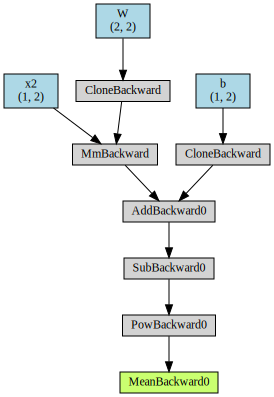


------------------------------------------------------------------

Meta update...

loss1_ = 69.30030822753906
loss2_ = 66.02531433105469

sumloss_ = 135.32562255859375

sumloss_ graph:


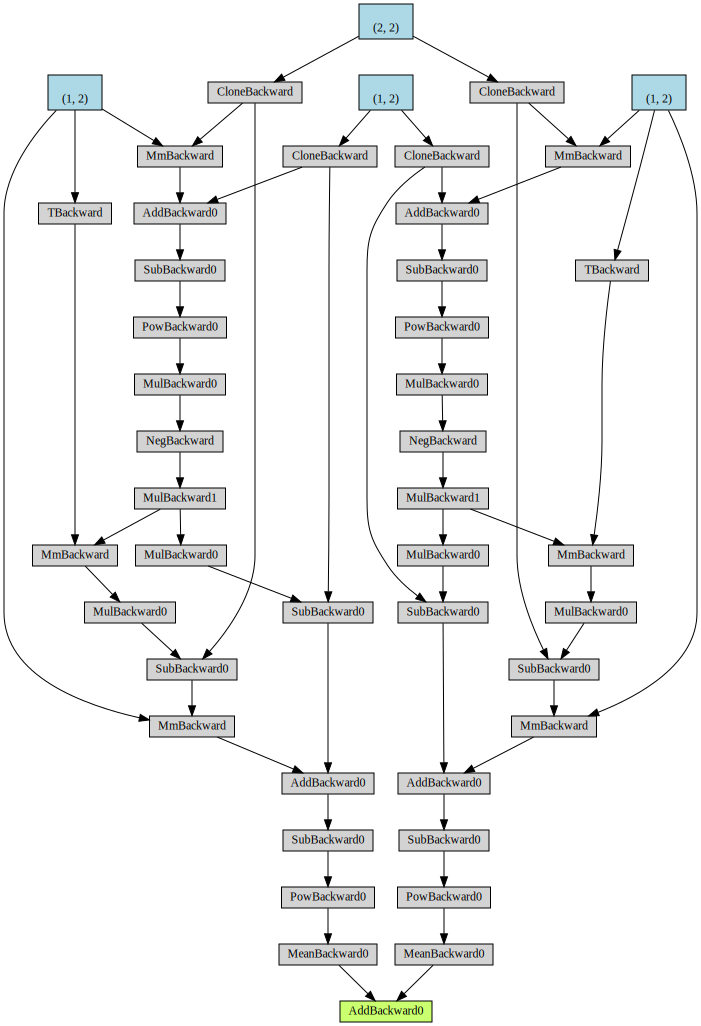

W, b after update:
-- W, b --
W.data:
tensor([[ 2.5145, -4.0504],
        [ 2.3099, -8.0494]], grad_fn=<SubBackward0>)
W.grad:
None
b.data:
tensor([[1.2327, 0.2943]], grad_fn=<SubBackward0>)
b.grad:
None
-- -- --



In [4]:
CREATE_GRAPH = True

# Learning rates.
lri = 0.001  # Inner.
lro = 0.05  # Outer.



# Theta parameters:
    
W = torch.tensor([[1., 0.5], [-0.8, 1.3]], requires_grad=True)
b = torch.tensor([[1., 1.]], requires_grad=True)
print("W, b initially:")
print_wb(W, b)



# -------------------------------------------------------
# Fast model 1.

_print_("------------------------------------------------------------------")
print_("Fast model 1:")

W1 = W.clone()
b1 = b.clone()

x1 = torch.tensor([[4.5, 9.5]], requires_grad=True)

y1 = torch.matmul(x1, W1) + b1
t1 = torch.tensor([[2., 3.]], requires_grad=False)

print_all_id(1, W1, b1, x1, y1, t1)

loss1 = ((t1 - y1)**2).mean()
_print_("loss1 = {}".format(loss1))
print("loss1 graph:")
disp.display(make_dot(loss1, params={"W": W, "b": b, "W1": W1, "b1": b1, "x1": x1, "y1": y1, "loss1": loss1}))

grads1 = torch.autograd.grad(outputs=loss1, inputs=(W1, b1), grad_outputs=torch.tensor(1.), retain_graph=True, create_graph=CREATE_GRAPH)
W1.grad = grads1[0]
b1.grad = grads1[1]
W1 = W1 - lri * W1.grad
b1 = b1 - lri * b1.grad



# -------------------------------------------------------
# Fast model 2.

_print_("------------------------------------------------------------------")
print_("Fast model 2:")

W2 = W.clone()
b2 = b.clone()

x2 = torch.tensor([[11.1, 22.2]], requires_grad=True)

y2 = torch.matmul(x2, W2) + b2
t2 = torch.tensor([[4., 7.]], requires_grad=False)

print_all_id(2, W2, b2, x2, y2, t2)

loss2 = ((t2 - y2)**2).mean()
_print_("loss2 = {}".format(loss2))
print("loss2 graph:")
disp.display(make_dot(loss2, params={"W": W, "b": b, "W2": W2, "b2": b2, "x2": x2, "y2": y2, "loss2": loss2}))

grads2 = torch.autograd.grad(outputs=loss2, inputs=(W2, b2), grad_outputs=torch.tensor(1.), retain_graph=True, create_graph=CREATE_GRAPH)
W2.grad = grads2[0]
b2.grad = grads2[1]
W2 = W2 - lri * W2.grad
b2 = b2 - lri * b2.grad



# -------------------------------------------------------
# Meta updagte.

# print_wb(W, b)  # <-- To check these theta parameters are unchanged from their initial values.

_print_("------------------------------------------------------------------")
print("Meta update...")

# Calculate losses using theta-dash (updated) parameters.
y1_ = torch.matmul(x1, W1) + b1
loss1_ = ((t1 - y1_)**2).mean()
_print("loss1_ = {}".format(loss1_))
y2_ = torch.matmul(x2, W2) + b2
loss2_ = ((t2 - y2_)**2).mean()
print_("loss2_ = {}".format(loss2_))

sumloss_ = loss1_ + loss2_
print_("sumloss_ = {}".format(sumloss_))

print("sumloss_ graph:")
disp.display(make_dot(sumloss_))

grads_meta = torch.autograd.grad(outputs=sumloss_, inputs=(W, b), grad_outputs=torch.tensor(1.), retain_graph=False, create_graph=False)
W.grad = grads_meta[0]
b.grad = grads_meta[1]
W = W - lro * W.grad
b = b - lro * b.grad

print("W, b after update:")
print_wb(W, b)